In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("..")
import logging

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, LogNorm, Normalize

from xlstm_scaling_laws.analysis.parametric_sclaw_fit.data import (
    get_all_parametric_sclaw_fit_data_dataframe,
)
from xlstm_scaling_laws.analysis.parametric_sclaw_fit.plot.plot_model_training_data import (
    create_run_data_scatter_plot,
    get_combined_run_data_scatter_plot,
)

logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
    datefmt="%m/%d/%Y %H:%M:%S",
    level=logging.ERROR,
    force=True,
)

# Model Checkpoint Path Table


In this notebook, we create a table mapping the models in the "dataset of training runs" in the paper to the model checkpoint paths. 

All checkpoints are stored in a S3 bucket with the same directory structure as of training them. 
This is useful for locating the respective model checkpoints weights, downloading them and doing additional evals on each checkpoint.



292 Llama Runs
380 xLSTM Runs


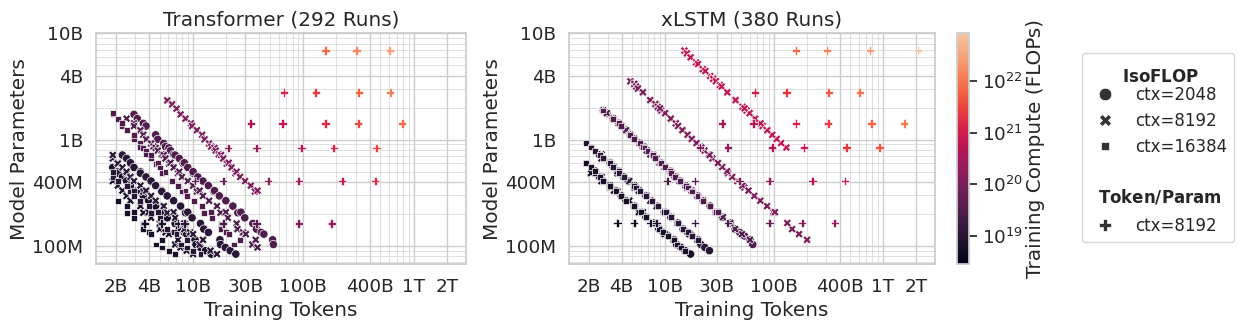

In [2]:
# Below we visualize the dataset of training runs
with sns.plotting_context("notebook", font_scale=1.2):
    with sns.axes_style("whitegrid"):
        fig = get_combined_run_data_scatter_plot(
            coloraxis="flops",
            add_axes_title=True,
            figsize=(12, 3),
        )

In [3]:
# These are the tables containing all training runs visualized in the above plot.
mlstm_df = get_all_parametric_sclaw_fit_data_dataframe(model_type="mlstm")
llama_df = get_all_parametric_sclaw_fit_data_dataframe(model_type="llama")

print(len(llama_df), "Llama Runs")
print(len(mlstm_df), "xLSTM Runs")

292 Llama Runs
380 xLSTM Runs


In [4]:
# The model checkpoint paths are stored as a json string in the dataframe, so we need to parse it to access the paths.
import json

json.loads(
    mlstm_df[
        [
            "experiment_set_ctx_length",
            "name",
            "run_id",
            "num_params",
            "num_tokens_training",
            "num_flops_training",
            "model_checkpoint_paths",
        ]
    ].iloc[0]["model_checkpoint_paths"]
)

['/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_iso1/dclm_mLSTMv1_500M_ctx2048_lr0.002_steps2200_nb24_ed1152_nh9_pf2.667_2025-04-12T10:40:04/0/wandb']

In [5]:
# Let's have a look at the full table of runs with the model checkpoint paths included.
mlstm_df[
    [
        "experiment_set_ctx_length",
        "name",
        "run_id",
        "num_params",
        "num_tokens_training",
        "num_flops_training",
        "model_checkpoint_paths",
    ]
]

,experiment_set_ctx_length,name,run_id,num_params,num_tokens_training,num_flops_training,model_checkpoint_paths
0,isoflop_ctx2048,dclm_mLSTMv1_500M_ctx2048_lr0.002_steps2200_nb...,4umgsj2s,5.039970e+08,2.306867e+09,6.262124e+18,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_..."
1,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps2200_nb...,9degndga,4.828152e+08,2.306867e+09,6.122120e+18,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_..."
2,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps2400_nb...,ujx5g0ew,4.448361e+08,2.516582e+09,6.088588e+18,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_..."
3,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps2600_nb...,dxehcglo,4.068569e+08,2.726298e+09,5.956709e+18,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_..."
4,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps3000_nb...,e7tp18os,3.688777e+08,3.145728e+09,6.135515e+18,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_..."
...,...,...,...,...,...,...,...
636,tokenparam_ctx8192,dclm_mLSTMv1_2.7B_ctx8192_lr0.0007_steps146000...,b6nbl9yz,2.780450e+09,6.123684e+11,9.928089e+21,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_mLSTM..."
637,tokenparam_ctx8192,dclm_mLSTMv1_7B_ctx8192_lr0.0005_steps73000_gb...,roo8xyr6-cb4q3k1y,6.865425e+09,3.061842e+11,1.238221e+22,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_mLSTM..."
638,tokenparam_ctx8192,dclm_mLSTMv1_7B_ctx8192_lr0.0005_steps76000_gb...,8egjdt0c,6.865425e+09,1.593836e+11,6.445535e+21,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_mLSTM..."
639,tokenparam_ctx8192,dclm_mLSTMv1_7B_ctx8192_lr0.0005_steps181000_g...,ui1zi0hi,6.865425e+09,7.591690e+11,3.070110e+22,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_mLSTM..."


In [6]:
# This is just left as a demonstration of how to access more run data...
from xlstm_scaling_laws.common.load_data import (
    get_default_run_data_calc_config,
    load_run_data,
    load_run_summary_table,
)
from xlstm_scaling_laws.load_data.datafiles import (
    RunDataSet,
    get_run_data_dict,
    get_run_data_file,
)
from xlstm_scaling_laws.run_data import RunData

mlstm_dataframe = load_run_summary_table(
    wandb_run_data_dict_file=get_run_data_file(data_set=RunDataSet.TOKENPARAM_MLSTM),
    run_data_class=RunData,
    config_calc_run_data=get_default_run_data_calc_config(
        attention_flop_calc_mode="distill_scaling",
        mlstm_fw_flop_calc_mode="first",
    ),
    group_runs_by="name",
)

mlstm_data = load_run_data(
    wandb_run_data_dict_file=get_run_data_file(data_set=RunDataSet.TOKENPARAM_MLSTM),
    run_data_class=RunData,
    config_calc_run_data=get_default_run_data_calc_config(
        attention_flop_calc_mode="distill_scaling",
        mlstm_fw_flop_calc_mode="first",
    ),
    group_runs_by="name",
)

mlstm_data_dict = get_run_data_dict(RunDataSet.TOKENPARAM_MLSTM, "distill_scaling")

len(mlstm_data_dict), len(mlstm_data), mlstm_data.keys()

(9,
 9,
 dict_keys(['scl_mlstm_160M', 'scl_mlstm_160Mv2', 'scl_mlstm_400M', 'scl_mlstm_830M', 'scl_mlstm_1.4B', 'scl_mlstm_2.7B', 'scl_mlstm_7B', 'scl_mlstm_rerun', 'dclm_mLSTMv1_7B_longrun_pretraining_final']))